<hr>

### 🎯 Module Overview
<hr>
This module covers everything you need to know about parsing and ingesting data for RAG systems, from basic text files to complex PDFs and databases. We'll use LangChain v0.3 and explore each technique with practical examples.

Table of Contents

- Introduction to Data Ingestion
- Text Files (.txt)
- PDF Documents
- Microsoft Word Documents
- CSV and Excel Files
- JSON and Structured Data
- Web Scraping
- Databases (SQL)
- Audio and Video Transcripts
- Advanced Techniques
- Best Practices

<hr>

### Introduction To Data Ingestion

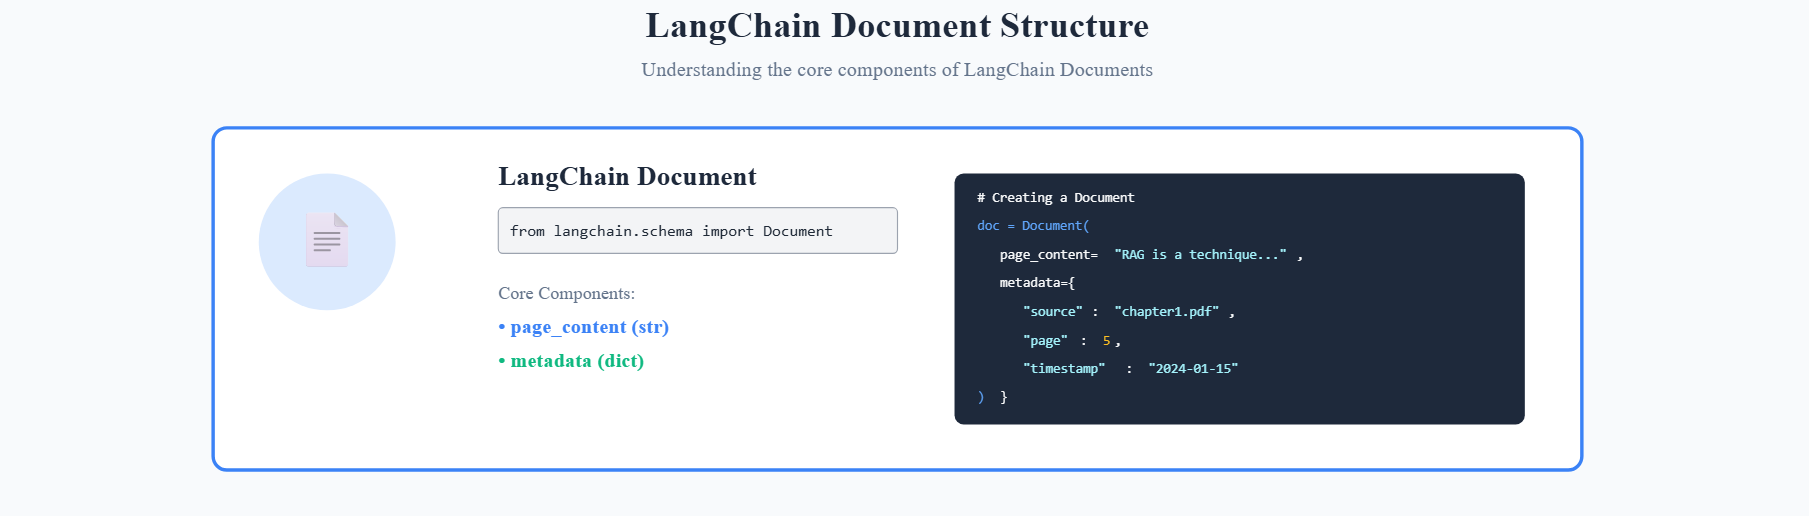 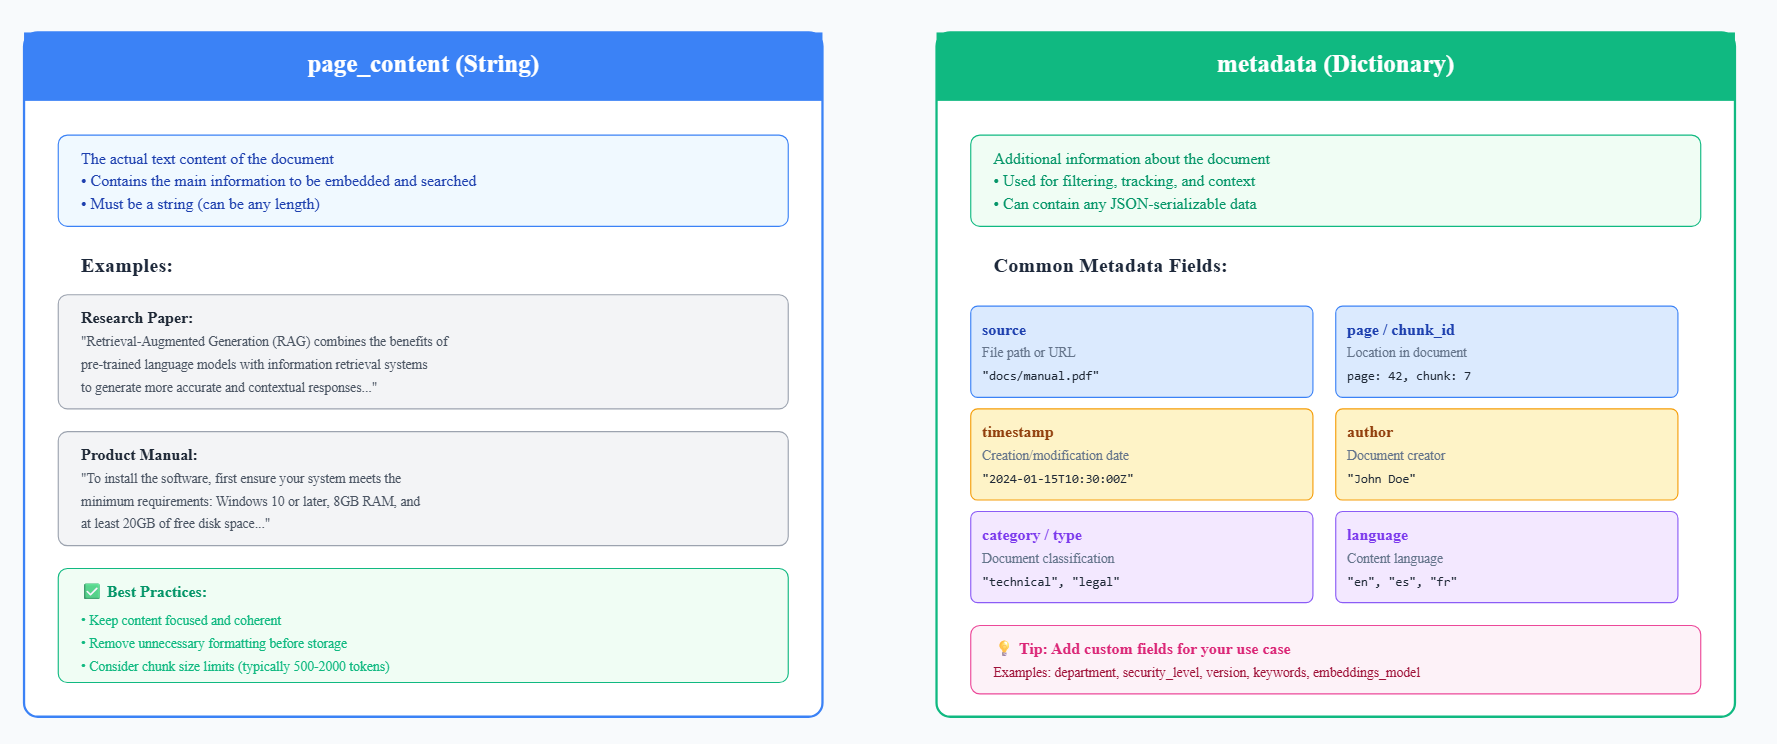 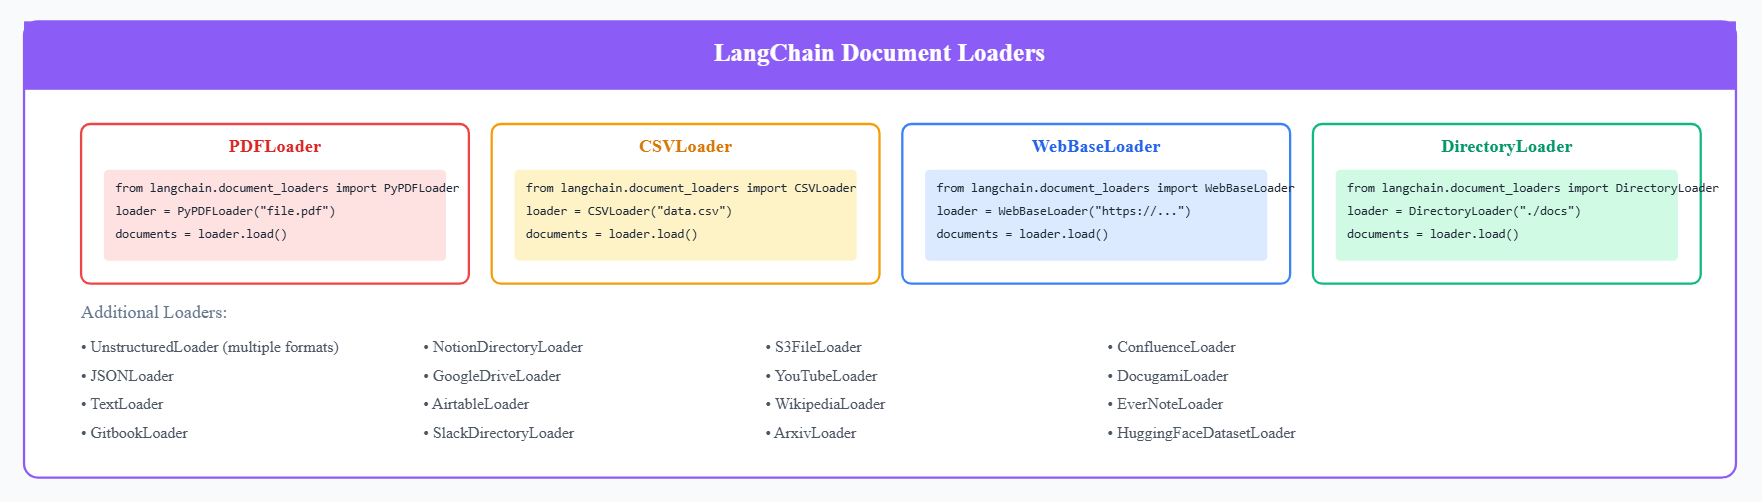 
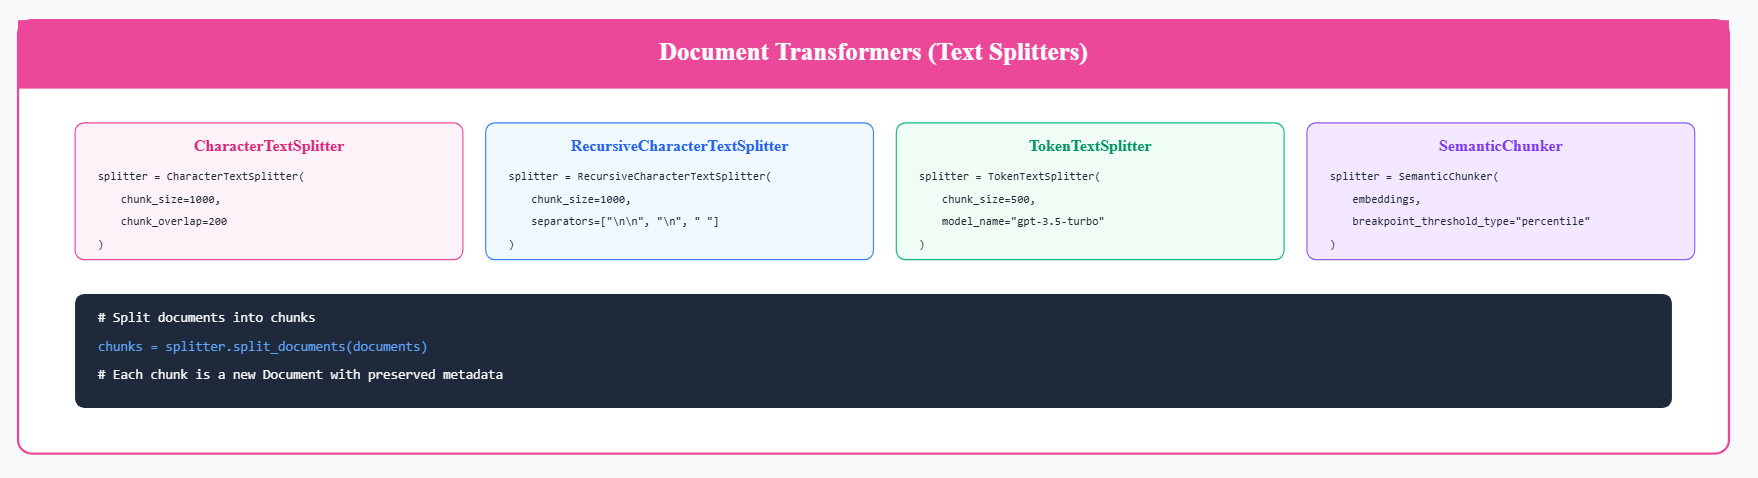

<hr>

### Langchain
`Click Here` 👉 [Langchain Docs](https://python.langchain.com/docs/introduction/?_gl=1*im1afz*_gcl_au*ODExMTc4NzMwLjE3NTIwNTIxOTA.*_ga*NTQ1MTU5ODEwLjE3NDk0MDI3NTk.*_ga_47WX3HKKY2*czE3NTY4MjM4MjMkbzE0JGcwJHQxNzU2ODIzODIzJGo2MCRsMCRoMA..)

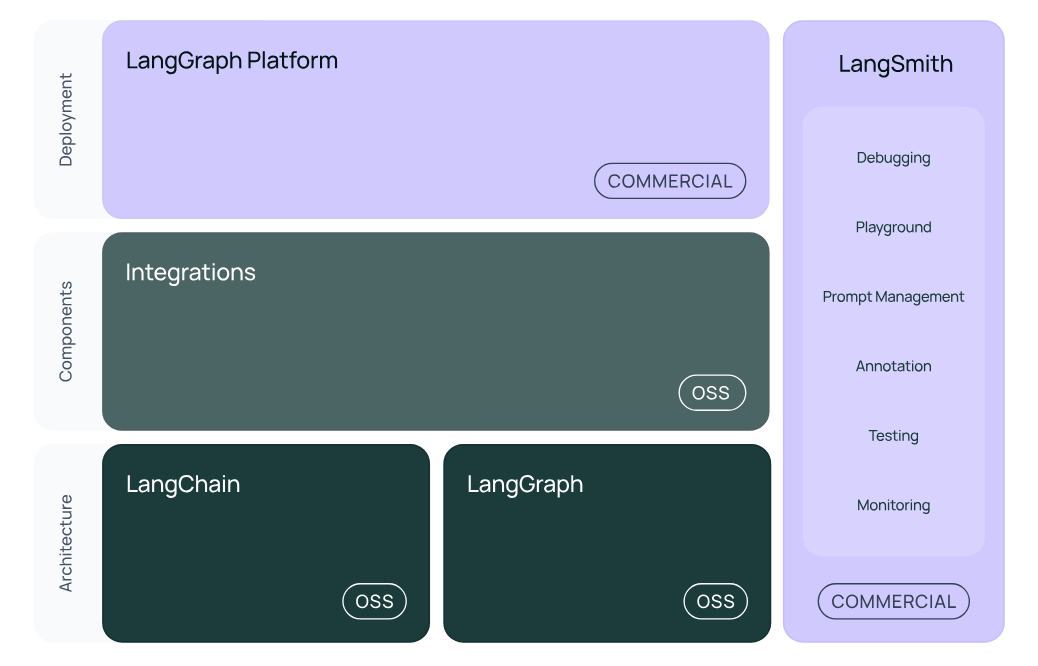

<hr>

In [8]:
import os
from typing import List, Dict, Any
import pandas as pd

<hr>

`Click Here` 👉 [Document](https://python.langchain.com/api_reference/core/documents/langchain_core.documents.base.Document.html)

`Click Here` 👉 [Text splitters](https://python.langchain.com/docs/concepts/text_splitters/)

`Click Here` 👉 [RecursiveCharacterTextSplitter](https://python.langchain.com/api_reference/text_splitters/character/langchain_text_splitters.character.RecursiveCharacterTextSplitter.html)

`Click Here` 👉 [CharacterTextSplitter](https://python.langchain.com/api_reference/text_splitters/character/langchain_text_splitters.character.CharacterTextSplitter.html)

`Click Here` 👉 [TokenTextSplitter](https://python.langchain.com/api_reference/text_splitters/base/langchain_text_splitters.base.TokenTextSplitter.html)
<hr>

In [7]:
from langchain_core.documents import Document 
from langchain.text_splitter import (
    RecursiveCharacterTextSplitter,
    CharacterTextSplitter,
    TokenTextSplitter 
)

print("Set up Completed!")

Set up Completed!


<hr>

### Understanding Document Structure In Langchain
<hr>

In [6]:
# Create a simple document

doc = Document(
    page_content="THis is the main text content that will be embedded and searched.",
    metadata={
        "source": "example.txt",
        "page": 1,
        "author": "Satish Tiwari",
        "date_created": "2025-09-02",
        "custom_field": "custom_value"
    }
)

print("Document Structure")

print(f"Content : {doc.page_content}")
print(f"Metadata :{doc.metadata}")

# Why metadata matters:
print("\n📝 Metadata is crucial for:")
print("- Filtering search results")
print("- Tracking document sources")
print("- Providing context in responses")
print("- Debugging and auditing")

Document Structure
Content : THis is the main text content that will be embedded and searched.
Metadata :{'source': 'example.txt', 'page': 1, 'author': 'Satish Tiwari', 'date_created': '2025-09-02', 'custom_field': 'custom_value'}

📝 Metadata is crucial for:
- Filtering search results
- Tracking document sources
- Providing context in responses
- Debugging and auditing


### Text Files (.txt) - The Simplest Case {#2-text-files}

In [1]:
# Create a simple txt file
import os 
os.makedirs("data/text_files", exist_ok=True)

In [2]:
sample_texts={
    "data/text_files/python_intro.txt":"""Python Programming Introduction

Python is a high-level, interpreted programming language known for its simplicity and readability.
Created by Guido van Rossum and first released in 1991, Python has become one of the most popular
programming languages in the world.

Key Features:
- Easy to learn and use
- Extensive standard library
- Cross-platform compatibility
- Strong community support

Python is widely used in web development, data science, artificial intelligence, and automation.""",
    
    "data/text_files/machine_learning.txt": """Machine Learning Basics

Machine learning is a subset of artificial intelligence that enables systems to learn and improve
from experience without being explicitly programmed. It focuses on developing computer programs
that can access data and use it to learn for themselves.

Types of Machine Learning:
1. Supervised Learning: Learning with labeled data
2. Unsupervised Learning: Finding patterns in unlabeled data
3. Reinforcement Learning: Learning through rewards and penalties

Applications include image recognition, speech processing, and recommendation systems
    
    
    """

}

for filepath,content in sample_texts.items():
    with open(filepath, 'w', encoding="utf-8") as f:
        f.write(content)

print("✅ Sample text files created!")

✅ Sample text files created!


### `Click Here` 👉 [TextLoader](https://python.langchain.com/api_reference/community/document_loaders/langchain_community.document_loaders.text.TextLoader.html) - Read Single File

In [13]:
from langchain.document_loaders import TextLoader
from langchain_community.document_loaders import TextLoader

# Loading a single text file
loader = TextLoader("data/text_files/python_intro.txt", encoding="utf-8")

documents = loader.load()
print(type(documents))
print("")
print(documents)
print("")
print(f"📄 Loaded {len(documents)} document")
print(f"Content preview: {documents[0].page_content[:100]}...")
print(f"Metadata: {documents[0].metadata}")

<class 'list'>

[Document(metadata={'source': 'data/text_files/python_intro.txt'}, page_content='Python Programming Introduction\n\nPython is a high-level, interpreted programming language known for its simplicity and readability.\nCreated by Guido van Rossum and first released in 1991, Python has become one of the most popular\nprogramming languages in the world.\n\nKey Features:\n- Easy to learn and use\n- Extensive standard library\n- Cross-platform compatibility\n- Strong community support\n\nPython is widely used in web development, data science, artificial intelligence, and automation.')]

📄 Loaded 1 document
Content preview: Python Programming Introduction

Python is a high-level, interpreted programming language known for ...
Metadata: {'source': 'data/text_files/python_intro.txt'}


### `Click Here` 👉 [DirectoryLoader](https://python.langchain.com/api_reference/community/document_loaders/langchain_community.document_loaders.directory.DirectoryLoader.html) - Multiple Text Files

In [19]:
from langchain_community.document_loaders import DirectoryLoader

# load all the text files from the directory
dir_loader = DirectoryLoader(
    path="data/text_files",
    glob="**/*.txt", # Pattern to match files
    loader_cls=TextLoader, # Loader class to use
    loader_kwargs={'encoding': 'utf-8'},
    show_progress=True
)

documents = dir_loader.load()

print(f"📁 Loaded {len(documents)} documents")
for i, doc in enumerate(documents):
    print(f"\nDocuemnt {i+1}:")
    print(f"  Source: {doc.metadata['source']}")
    print(f"  Length: {len(doc.page_content)} characters")
    print(f"  Content: {doc.page_content}")
    print("-" * 100)



100%|██████████| 2/2 [00:00<00:00, 1197.35it/s]

📁 Loaded 2 documents

Docuemnt 1:
  Source: data\text_files\machine_learning.txt
  Length: 575 characters
  Content: Machine Learning Basics

Machine learning is a subset of artificial intelligence that enables systems to learn and improve
from experience without being explicitly programmed. It focuses on developing computer programs
that can access data and use it to learn for themselves.

Types of Machine Learning:
1. Supervised Learning: Learning with labeled data
2. Unsupervised Learning: Finding patterns in unlabeled data
3. Reinforcement Learning: Learning through rewards and penalties

Applications include image recognition, speech processing, and recommendation systems


    
----------------------------------------------------------------------------------------------------

Docuemnt 2:
  Source: data\text_files\python_intro.txt
  Length: 489 characters
  Content: Python Programming Introduction

Python is a high-level, interpreted programming language known for its simplicity

### 📊 Analysis

In [20]:
# 📊 Analysis between TextLoader and DirectoryLoader

print("\n📊 DirectoryLoader Characteristics:")
print("✅ Advantages:")
print("  - Loads multiple files at once")
print("  - Supports glob patterns")
print("  - Progress tracking")
print("  - Recursive directory scanning")

print("\n❌ Disadvantages:")
print("  - All files must be same type")
print("  - Limited error handling per file")
print("  - Can be memory intensive for large directories")


📊 DirectoryLoader Characteristics:
✅ Advantages:
  - Loads multiple files at once
  - Supports glob patterns
  - Progress tracking
  - Recursive directory scanning

❌ Disadvantages:
  - All files must be same type
  - Limited error handling per file
  - Can be memory intensive for large directories
